In [1]:
import numpy as np
import pandas as pd
import os 
%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt 


C:\Users\ranam\AppData\Local\Temp\ipykernel_19740\2053032497.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#load the dataset 

In [2]:
# load the data
DATASET_PATH = r'C:\Users\ranam\Documents\ML\projects\datasets'
def load_data (car_evaluation_path = DATASET_PATH):
    csv_path = os.path.join(car_evaluation_path,"car_evaluation.csv")
    return pd.read_csv(csv_path)

# load the head data
CarEvaluation = load_data()
CarEvaluation.tail(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
1717,low,low,5more,4,big,high,vgood
1718,low,low,5more,more,small,low,unacc
1719,low,low,5more,more,small,med,acc
1720,low,low,5more,more,small,high,good
1721,low,low,5more,more,med,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


#RENAME THE COLUMNS 

In [3]:
new_columns= {"vhigh":"buying", "vhigh.1":"maint", "2":"doors", "2.1":"persons", "small":"lug_boot", "low":"safety", "unacc":"class"}
CarEvaluation = CarEvaluation.rename(columns= new_columns)
CarEvaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
print(CarEvaluation.shape)
print(CarEvaluation.isnull().sum())

(1727, 7)
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [5]:
new_columns = ["buying","maint","doors","persons","lug_boot", "safety", "class"]
for col in new_columns:
    print(CarEvaluation[col].value_counts(ascending= True))

buying
vhigh    431
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    431
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        431
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       575
4       576
more    576
Name: count, dtype: int64
lug_boot
small    575
med      576
big      576
Name: count, dtype: int64
safety
low     575
med     576
high    576
Name: count, dtype: int64
class
vgood      65
good       69
acc       384
unacc    1209
Name: count, dtype: int64


In [6]:
print(CarEvaluation['class'].value_counts(ascending= True))

class
vgood      65
good       69
acc       384
unacc    1209
Name: count, dtype: int64


#SPILITING THE DATASET

#preprocessing on dataset

In [7]:
CarEvaluation["doors"] = CarEvaluation["doors"].replace('5more',5).astype(int) 
CarEvaluation["persons"] = CarEvaluation["persons"].replace('more',5).astype(int) 

In [8]:
CarEvaluation.tail(10)

,buying,maint,doors,persons,lug_boot,safety,class
1717,low,low,5,4,big,high,vgood
1718,low,low,5,5,small,low,unacc
1719,low,low,5,5,small,med,acc
1720,low,low,5,5,small,high,good
1721,low,low,5,5,med,low,unacc
1722,low,low,5,5,med,med,good
1723,low,low,5,5,med,high,vgood
1724,low,low,5,5,big,low,unacc
1725,low,low,5,5,big,med,good
1726,low,low,5,5,big,high,vgood


In [9]:
# spliting dataset into x and y 
X = CarEvaluation.drop(["class"], axis=1)
y = CarEvaluation["class"]

In [10]:
# encoding 
from sklearn.preprocessing import LabelEncoder  
#le = LabelEncoder()
cols_X=['buying', 'maint','lug_boot', 'safety']
for item in cols_X:
    X[item]=LabelEncoder().fit_transform(X[item])

In [11]:
X.tail(20)

,buying,maint,doors,persons,lug_boot,safety
1707,1,1,5,2,0,2
1708,1,1,5,2,0,0
1709,1,1,5,4,2,1
1710,1,1,5,4,2,2
1711,1,1,5,4,2,0
1712,1,1,5,4,1,1
1713,1,1,5,4,1,2
1714,1,1,5,4,1,0
1715,1,1,5,4,0,1
1716,1,1,5,4,0,2


In [12]:
y.tail(10)

1717    vgood
1718    unacc
1719      acc
1720     good
1721    unacc
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, dtype: object

In [13]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [14]:
y.shape

(1727,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [16]:
X_train.shape
X_test.shape

(346, 6)

In [17]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0,0,4,2,0,1
932,2,3,4,4,0,1
628,0,0,5,2,0,0
1497,1,0,5,4,1,2
1262,2,1,4,5,1,1


In [18]:
X_test.tail()

,buying,maint,doors,persons,lug_boot,safety
100,3,3,5,5,2,0
274,3,2,4,2,1,0
1205,2,1,2,5,2,1
101,3,3,5,5,1,1
1157,2,2,4,5,0,1


In [19]:
#scaling 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
for i in X.columns:
    X[i] = scaler.fit_transform(X[[i]])

# training using different models 
#before scaling


In [20]:
from sklearn.metrics import confusion_matrix ,accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [21]:
models = {'LogisticRegression':LogisticRegression(),
'gbc':GradientBoostingClassifier(),
'ada':AdaBoostClassifier(),
'svm':SVC()
,'knn' : KNeighborsClassifier()
,'DecisionTree':DecisionTreeClassifier(),
'RandomForest': RandomForestClassifier()}

In [22]:
for keys , values in models.items():
    print(keys)
    values.fit(X_train,y_train)
    predictions = values.predict(X_test)
    print(classification_report(y_test,predictions))

LogisticRegression
              precision    recall  f1-score   support

           0       0.32      0.16      0.21        77
           1       0.00      0.00      0.00        15
           2       0.73      0.95      0.83       237
           3       0.33      0.06      0.10        17

    accuracy                           0.68       346
   macro avg       0.35      0.29      0.28       346
weighted avg       0.59      0.68      0.62       346

gbc


c:\Users\ranam\anaconda3\envs\learn\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ranam\anaconda3\envs\learn\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ranam\anaconda3\envs\learn\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95        77
           1       0.79      0.73      0.76        15
           2       1.00      0.99      1.00       237
           3       0.84      0.94      0.89        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346

ada
              precision    recall  f1-score   support

           0       0.64      0.36      0.46        77
           1       0.36      0.53      0.43        15
           2       0.84      0.90      0.87       237
           3       0.68      1.00      0.81        17

    accuracy                           0.77       346
   macro avg       0.63      0.70      0.64       346
weighted avg       0.77      0.77      0.76       346

svm


c:\Users\ranam\anaconda3\envs\learn\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ranam\anaconda3\envs\learn\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ranam\anaconda3\envs\learn\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ranam\anaconda3\envs\learn\Lib\site-packages\sklearn\metrics\_classific

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        77
           1       0.00      0.00      0.00        15
           2       0.84      0.99      0.91       237
           3       1.00      0.24      0.38        17

    accuracy                           0.79       346
   macro avg       0.60      0.42      0.45       346
weighted avg       0.75      0.79      0.75       346

knn
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       1.00      0.13      0.24        15
           2       0.96      1.00      0.98       237
           3       0.92      0.65      0.76        17

    accuracy                           0.91       346
   macro avg       0.92      0.66      0.70       346
weighted avg       0.92      0.91      0.90       346

DecisionTree
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
    

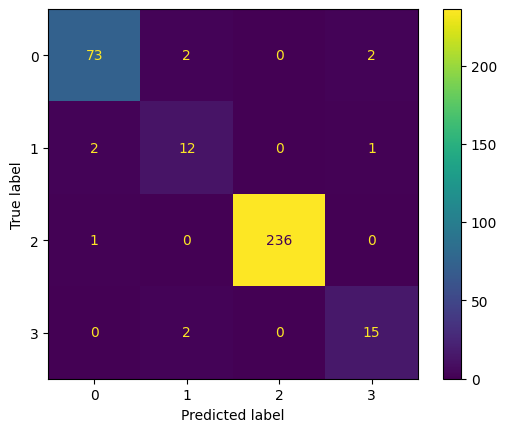

In [23]:
dtree_model = DecisionTreeClassifier().fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [26]:

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
accuracy

0.7138728323699421